In [3]:
mongoimport --type csv -d DB_wildfire -c california_list --headerline --drop California_Fire_Incidents.csv

SyntaxError: invalid syntax (1788657794.py, line 1)

In [63]:
from pymongo import MongoClient
import pandas as pd
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [32]:
mongo = MongoClient(port=27017)

In [33]:
# assign the uk_food database to a variable name
db = mongo['DB_wildfire']

In [34]:
collections = db.list_collection_names()
collections

['california_list']

In [35]:
# assign the collection to a variable
california_l = db['california_list']

In [46]:
data = list(california_l.find())

In [47]:
df = pd.DataFrame(data)

In [48]:
# Delete the "_id" column of the data frame
if "_id" in df.columns:
    df.drop(columns=["_id"], inplace=True)

In [49]:
# Print the data frame
print(df.head())

  AcresBurned Active                                          AdminUnit  \
0       27531  False  CAL FIRE Riverside Unit / San Bernardino Natio...   
1      257314  False  Stanislaus National Forest/Yosemite National Park   
2       24251  False                       Ventura County Fire/CAL FIRE   
3       22992  False                             Sierra National Forest   
4       30274  False  USFS Angeles National Forest/Los Angeles Count...   

  AirTankers  ArchiveYear CalFireIncident  \
0                    2013            True   
1                    2013            True   
2                    2013            True   
3                    2013           False   
4                    2013            True   

                            CanonicalUrl  \
0    /incidents/2013/7/15/mountain-fire/   
1         /incidents/2013/8/17/rim-fire/   
2      /incidents/2013/5/2/springs-fire/   
3       /incidents/2013/7/22/aspen-fire/   
4  /incidents/2013/5/30/powerhouse-fire/   

             

In [50]:
# Select the first 5 rows of the data frame
df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,27531,False,CAL FIRE Riverside Unit / San Bernardino Natio...,,2013,True,/incidents/2013/7/15/mountain-fire/,,,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,,,,,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,
1,257314,False,Stanislaus National Forest/Yosemite National Park,,2013,True,/incidents/2013/8/17/rim-fire/,,,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,,,,,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,
2,24251,False,Ventura County Fire/CAL FIRE,,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6,10,,,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11
3,22992,False,Sierra National Forest,,2013,False,/incidents/2013/7/22/aspen-fire/,,,Fresno,...,"217 Aspen Fire, July 2013, Big Creek, Fresno ...",2013-07-22T22:15:00Z,Finalized,,,,,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,2013-09-24T20:15:00Z,
4,30274,False,USFS Angeles National Forest/Los Angeles Count...,,2013,True,/incidents/2013/5/30/powerhouse-fire/,,,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,,,,,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,


In [52]:
# How many columns have null values
print(df.isnull().sum())

AcresBurned             0
Active                  0
AdminUnit               0
AirTankers              0
ArchiveYear             0
CalFireIncident         0
CanonicalUrl            0
ConditionStatement      0
ControlStatement        0
Counties                0
CountyIds               0
CrewsInvolved           0
Dozers                  0
Engines                 0
Extinguished            0
Fatalities              0
Featured                0
Final                   0
FuelType                0
Helicopters             0
Injuries                0
Latitude                0
Location                0
Longitude               0
MajorIncident           0
Name                    0
PercentContained        0
PersonnelInvolved       0
Public                  0
SearchDescription       0
SearchKeywords          0
Started                 0
Status                  0
StructuresDamaged       0
StructuresDestroyed     0
StructuresEvacuated     0
StructuresThreatened    0
UniqueId                0
Updated     

In [54]:
# Reduce the data frame by extracting "Acress Burned", "Archive Year", 
# "Latitude", "Longitude", "Counties", "CountyIds"
reduced_df = df.loc[:, ["AcresBurned", "ArchiveYear", "Counties",
                       "CountyIds", "Latitude", "Longitude"]]
reduced_df.head(10)

,AcresBurned,ArchiveYear,Counties,CountyIds,Latitude,Longitude
0,27531,2013,Riverside,33,33.709500,-116.728850
1,257314,2013,Tuolumne,55,37.857000,-120.086000
2,24251,2013,Ventura,56,0.000000,0.000000
3,22992,2013,Fresno,10,37.279000,-119.318000
4,30274,2013,Los Angeles,19,34.585595,-118.423176
5,27440,2013,Placer,31,39.120000,-120.650000
6,20292,2013,Riverside,33,33.861570,-116.904270
7,14754,2013,Siskiyou,47,41.320000,-123.176000
8,11429,2013,Tehama,52,40.042630,-121.853970
9,8073,2013,Shasta,45,40.498332,-122.535496


In [55]:
reduced_df = reduced_df[["ArchiveYear", "Counties", "CountyIds", "AcresBurned",
                        "Latitude", "Longitude"]]
reduced_df.head()

,ArchiveYear,Counties,CountyIds,AcresBurned,Latitude,Longitude
0,2013,Riverside,33,27531,33.709500,-116.728850
1,2013,Tuolumne,55,257314,37.857000,-120.086000
2,2013,Ventura,56,24251,0.000000,0.000000
3,2013,Fresno,10,22992,37.279000,-119.318000
4,2013,Los Angeles,19,30274,34.585595,-118.423176


In [56]:
# Visualize the data type of each column
reduced_df.dtypes

ArchiveYear      int64
Counties        object
CountyIds       object
AcresBurned     object
Latitude       float64
Longitude      float64
dtype: object

In [59]:
# Turn the data type from "AcresBurned" column to float
reduced_df["AcresBurned"] = pd.to_numeric(reduced_df["AcresBurned"], errors = "coerce")


In [60]:
reduced_df.dtypes

ArchiveYear      int64
Counties        object
CountyIds       object
AcresBurned    float64
Latitude       float64
Longitude      float64
dtype: object

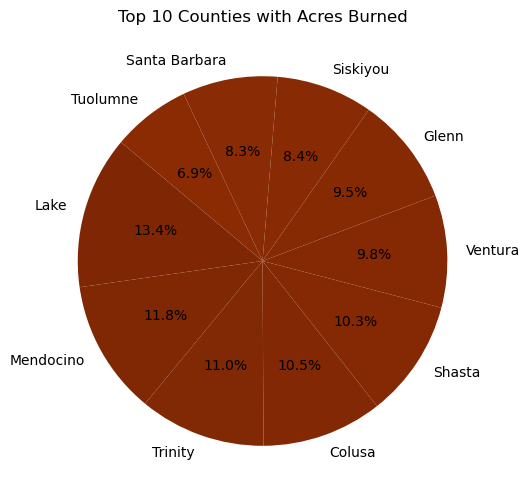

In [64]:
# Determine total amount of acres burned by counties

acres_per_county = reduced_df.groupby("Counties")["AcresBurned"].sum().sort_values(ascending=False)

top_counties_acres = acres_per_county.head(10)

plt.figure(figsize=(10,6))
plt.pie(top_counties_acres, labels=top_counties_acres.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Oranges_r(range(10)))

plt.title("Top 10 Counties with Acres Burned")
plt.savefig("Top_Counties_with_Acres_Burned.png")
plt.show()


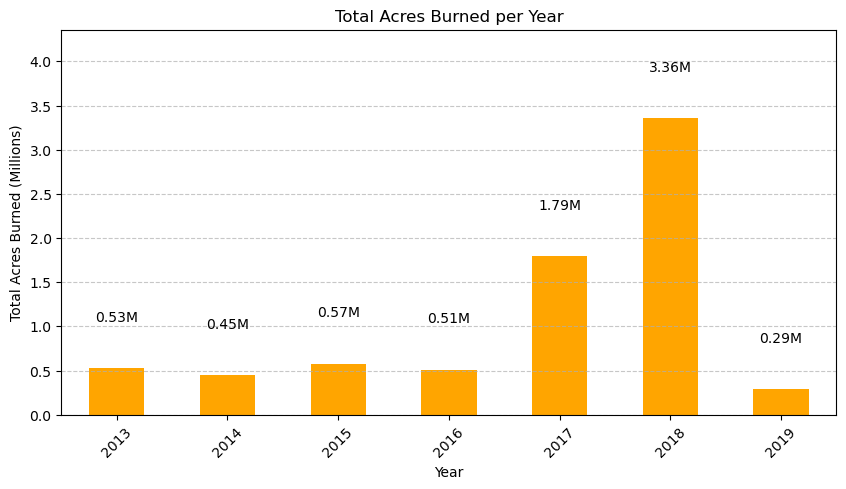

In [65]:
# Groupby the Acres Burned by year
acres_burned_per_year = reduced_df.groupby("ArchiveYear")["AcresBurned"].sum()

# Turned the Acres Burned to Millions
acres_burned_per_year_million = acres_burned_per_year / 1000000

# Create the bar chart
plt.figure(figsize=(10,5))
ab = acres_burned_per_year_million.plot(kind="bar", color="orange")

# Add the total Acres Burned value to each bar 
for i, value in enumerate(acres_burned_per_year_million):
    ab.text(i, value + 0.5, f'{value:,.2f}M', ha='center', va='bottom', fontsize=10)

# Bar chart
plt.xlabel("Year")
plt.ylabel("Total Acres Burned (Millions)")
plt.title("Total Acres Burned per Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.ylim(0, acres_burned_per_year_million.max() + 1)
plt.savefig("Total_Acres_Burned_per_Year.png")
plt.show()
